<a href="https://colab.research.google.com/github/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/blob/main/ML_NO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing dependencies

import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/content/NOxData.csv')
df.isnull().sum()

,0
date_local,0
avgtempC,0
winddirDegree,0
windspeedKmph,0
cloudcover,0
humidity,0
precipInches,0
pressure,0
visibility,0
maxtempC,0


In [11]:
df.head()

,date_local,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,NO2
0,1/1/15,2,70,13,98,87,0.2,1025,10,4,1,3.8,9.175000
1,1/2/15,4,137,13,99,89,0.1,1019,8,5,4,3.8,9.308333
2,1/3/15,7,277,11,35,78,0.1,1016,9,14,3,7.1,10.916667
3,1/4/15,6,218,17,2,67,0.0,1030,10,8,2,8.7,4.763636
4,1/5/15,3,93,10,1,56,0.0,1036,10,8,-2,8.7,20.108333


In [23]:
df['date_local'] = pd.to_datetime(df['date_local'], format='%m/%d/%y')
df.head()

,date_local,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,NO2
0,2015-01-01,2,70,13,98,87,0.2,1025,10,4,1,3.8,9.175000
1,2015-01-02,4,137,13,99,89,0.1,1019,8,5,4,3.8,9.308333
2,2015-01-03,7,277,11,35,78,0.1,1016,9,14,3,7.1,10.916667
3,2015-01-04,6,218,17,2,67,0.0,1030,10,8,2,8.7,4.763636
4,2015-01-05,3,93,10,1,56,0.0,1036,10,8,-2,8.7,20.108333


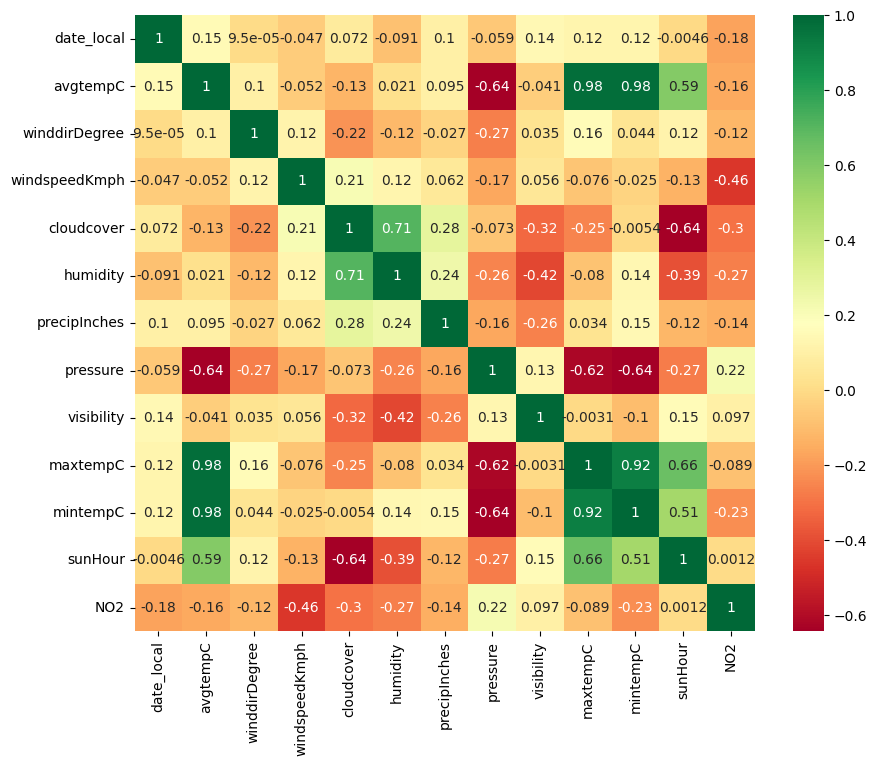

In [24]:
# graphical representation of correlation
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
X = df[['winddirDegree', 'windspeedKmph','cloudcover', 'humidity', 'pressure', 'mintempC']]
y = df['NO2']

In [27]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

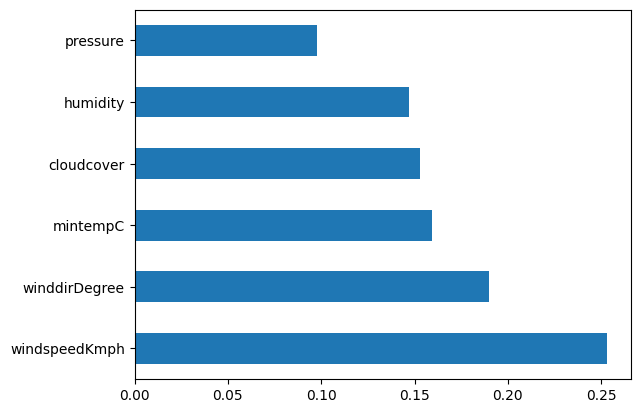

In [30]:
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Linear Regression

<ipython-input-31-0f415a98584e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='NO2', ylabel='Density'>

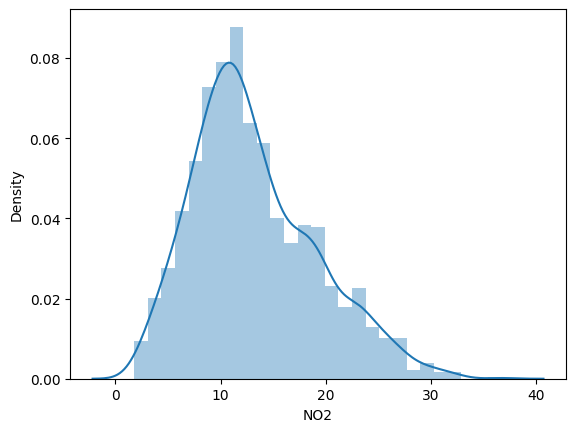

In [31]:
sns.distplot(y)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lm = LinearRegression()
lm.fit(X_train, y_train)

print('coefficients: ', lm.coef_)
print('intercept: ', lm.intercept_)

coefficients:  [-0.01397955 -0.49463103 -0.03886376 -0.03024237 -0.12887108 -0.22641705]
intercept:  160.3827019603318


In [33]:
score = cross_val_score(lm, X, y, cv=5)
score.mean()

0.27719848124402385

## Predictions

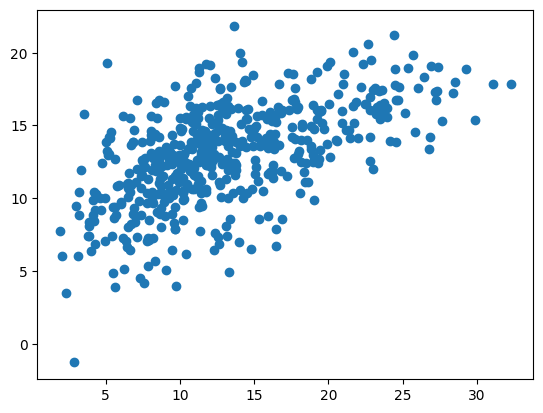

In [34]:
y_train_predictions = lm.predict(X_train)
y_test_predictions = lm.predict(X_test)
plt.scatter(y_test, y_test_predictions)

<ipython-input-35-562ae174378b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='NO2', ylabel='Density'>

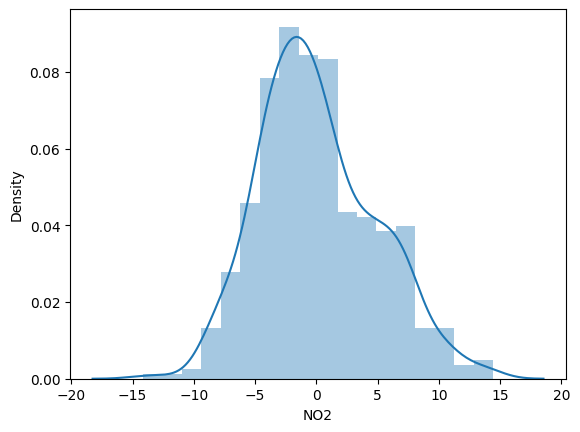

In [35]:
sns.distplot(y_test - y_test_predictions)

In [51]:
from sklearn.metrics import r2_score
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predictions)))

MAE: 3.8085662956600195
MSE: 22.652081780440714
RMSE: 4.759420319791131


In [38]:
print(f"Coefficient of determination R^2 <-- on train set: {r2_score(y_train, y_train_predictions):.2f}")
print(f"Coefficient of determination R^2 <-- on test set: {r2_score(y_test, y_test_predictions):.2f}")

Coefficient of determination R^2 <-- on train set: 0.32
Coefficient of determination R^2 <-- on test set: 0.34


### Feature Selection (Scaling)

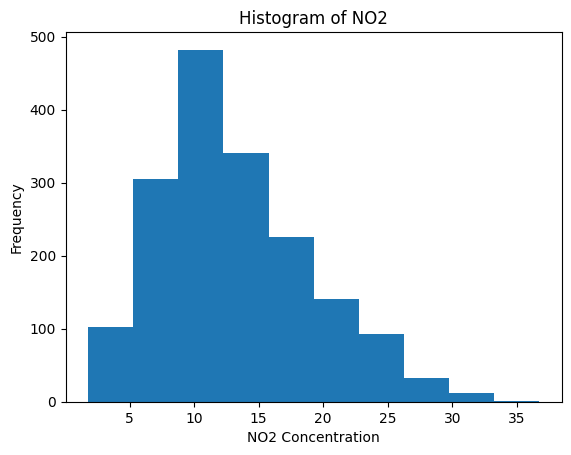

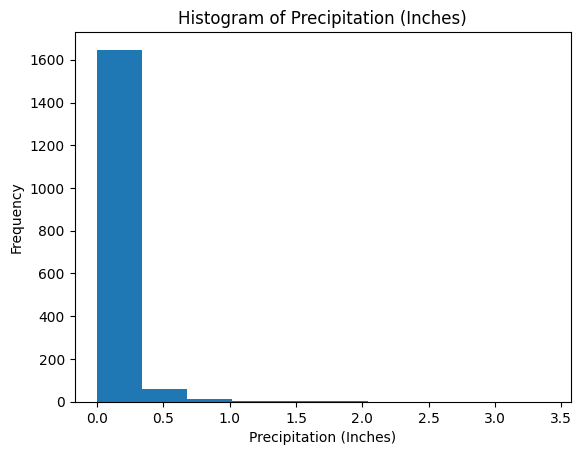

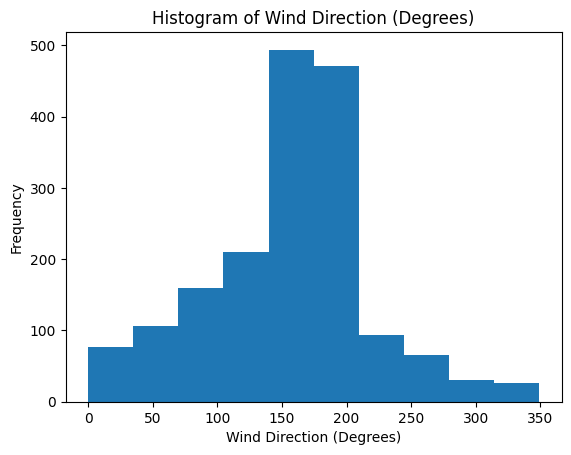

In [41]:
plt.hist(df['NO2'])
plt.title('Histogram of NO2')
plt.xlabel('NO2 Concentration')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['precipInches'])
plt.title('Histogram of Precipitation (Inches)')
plt.xlabel('Precipitation (Inches)')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['winddirDegree'])
plt.title('Histogram of Wind Direction (Degrees)')
plt.xlabel('Wind Direction (Degrees)')
plt.ylabel('Frequency')
plt.show()


In [42]:
X = df[['avgtempC', 'winddirDegree', 'windspeedKmph', 'cloudcover', 'humidity', 'precipInches', 'pressure', 'visibility', 'maxtempC', 'mintempC', 'sunHour']]
y = df['NO2']

In [43]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [45]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
maxtempC,0.617341
mintempC,0.591094
visibility,0.510445
winddirDegree,0.453461
precipInches,0.060517
windspeedKmph,0.051498
pressure,0.041792
humidity,0.033802
avgtempC,0.017877


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
stand_coef_linear_reg = make_pipeline(scaler, model)
stand_coef_linear_reg.fit(X, y)

# standardizing the variables so that the values are converted to lie between -3 and +3
result = pd.DataFrame(list(zip(stand_coef_linear_reg.steps[1][1].coef_, df.columns)),
                     columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values('coefficient', ascending=False)

,coefficient
name,
maxtempC,4.598393
visibility,4.232569
winddirDegree,2.286212
mintempC,1.715315
windspeedKmph,1.496233
avgtempC,1.111500
precipInches,0.338255
cloudcover,0.123136
pressure,0.059633


### Implementing Linear Regression with important features based on standardized results

In [47]:
# selecting features
X = df[['maxtempC', 'visibility', 'winddirDegree', 'mintempC', 'windspeedKmph']] #independent features
y = df['NO2']  ## dependent features

# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
print('coefficients: ', [f"{coef:.2f}" for coef in lm.coef_])
print('intercept: ', f"{lm.intercept_:.2f}")

coefficients:  ['0.58', '0.11', '-0.02', '-0.77', '-0.48']
intercept:  18.66


### Predictive Analysis

<ipython-input-53-9b55043406b7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='NO2', ylabel='Density'>

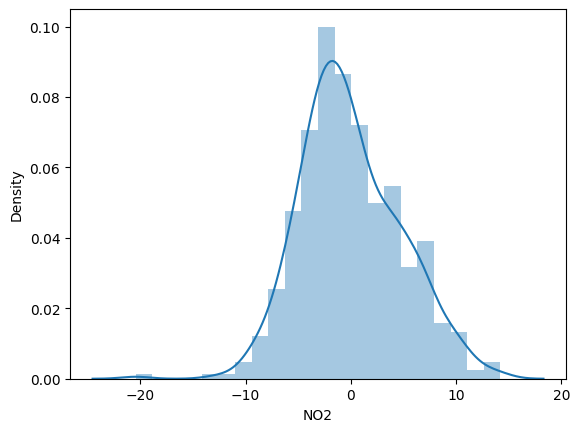

In [53]:
y_train_predictions = lm.predict(X_train)
y_test_predictions = lm.predict(X_test)
sns.distplot(y_test - y_test_predictions)

### Residual Analysis

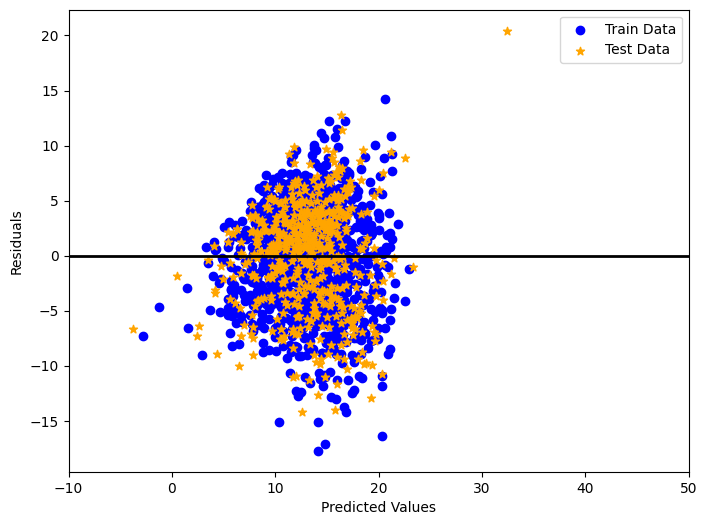

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_predictions, y_train_predictions - y_train, c="blue", marker="o", label="Train Data")
plt.scatter(y_test_predictions, y_test_predictions - y_test, c="orange", marker="*", label="Test Data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color="k")
plt.xlim([-10, 50])
plt.show()

In [55]:
print('MSE for training data: {:.2f}'.format(metrics.mean_squared_error(y_train, y_train_predictions)))
print('MSE for test data: {:.2f}'.format(metrics.mean_squared_error(y_test, y_test_predictions)))

print("Coefficient of determination R^2 <-- on train set: {:.2f}".format(r2_score(y_train, y_train_predictions)))
print("Coefficient of determination R^2 <-- on test set: {:.2f}".format(r2_score(y_test, y_test_predictions)))

MSE for training data: 21.98
MSE for test data: 22.75
Coefficient of determination R^2 <-- on train set: 0.36
Coefficient of determination R^2 <-- on test set: 0.34


### Polynomial Regression - With Multiple Variable (Multivariate)

In [58]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

y_pred = polyreg.predict(poly.fit_transform(X_test))
r_square = metrics.r2_score(y_test, y_pred)
print(f'R-Square Error associated with Polynomial Regression is: {r_square:.2f}')
print('MSE for testing data: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))

R-Square Error associated with Polynomial Regression is: 0.44
MSE for testing data: 19.35


Using Polynomial Regression of degree 2 has reduced the Mean Square Error from 22.7 to 19.3

and has increased the R squared values from 33 to 43 on the testing data set.

In [59]:
import scipy
import statsmodels.api as sm

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    NO2   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              2256.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):                        0.00
Time:                        17:54:36   Log-Likelihood:                         -5338.0
No. Observations:                1734   AIC:                                  1.069e+04
Df Residuals:                    1729   BIC:                                  1.071e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

print('Best parameters:', lasso_regressor.best_params_)
print('Best score: {:.2f}'.format(lasso_regressor.best_score_))

Best parameters: {'alpha': 1}
Best score: -23.56


{'alpha': 1}
-23.555614579370758


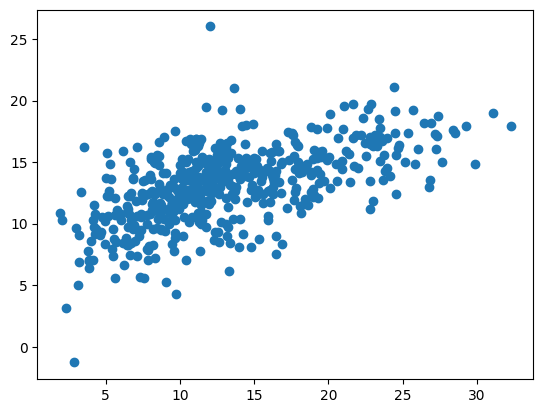

In [65]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

prediction_lasso = lasso_regressor.predict(X_test)
plt.scatter(y_test, prediction_lasso)

<Axes: xlabel='NO2', ylabel='Density'>

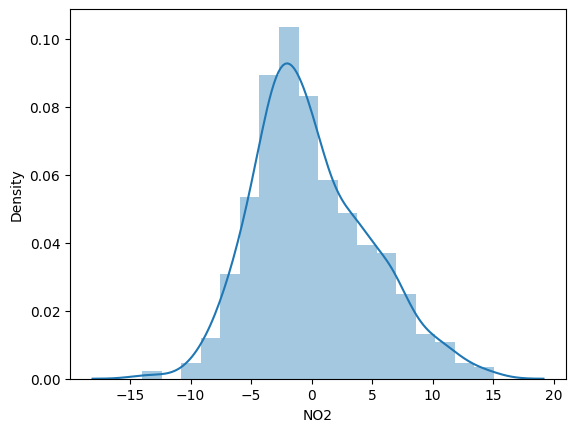

In [66]:
sns.distplot(y_test - prediction_lasso)

In [67]:
print('MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, prediction_lasso)))
print('MSE: {:.2f}'.format(metrics.mean_squared_error(y_test, prediction_lasso)))
print('RMSE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso))))

MAE: 3.81
MSE: 22.84
RMSE: 4.78


# Ridge Regression

In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [70]:
print('Best parameters:', ridge_regressor.best_params_)
print('Best score: {:.2f}'.format(ridge_regressor.best_score_))

Best parameters: {'alpha': 40}
Best score: -23.61
